# 📌 Financial Inclusion

The aim is  to predict the likelihood of the person having a bank account or not (Yes = 1, No = 0), for each unique id in the test dataset across four East African countries - Kenya, Rwanda, Tanzania, and Uganda.

This notebook covers:
- Loading the data
- Sanity check of data
- Exploratory Data Analysis(EDA)
- Outlier Treatments
- Normalization
- Encoding of data
- Creating a  model
- Saving the outcomes

## Step 1: Import Libraries 🛠️

In [1]:
# 📌 Import necessary libraries for data handling, visualization, and modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Suppress warnings for better readability
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path= "/content/drive/MyDrive/Financial Inclusion/"

## Step 2: Load the Dataset 📥

In [4]:
# 📥 Load datasets
train = pd.read_csv(path + 'Train.csv')  # Training dataset
test = pd.read_csv(path + 'Test.csv')  # Test dataset (no labels)
ss = pd.read_csv(path + 'SampleSubmission.csv')  # Sample submission format
variables = pd.read_csv(path + 'VariableDefinitions.csv')  # Data dictionary



## Step 3: Checking Sanity of the DataSet

## Checking few rows of the data

In [5]:
# Display first few rows to understand structure
print("🔹 Training Data Preview:")
display(train.head())



🔹 Training Data Preview:


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Display last few rows to understand structure
print("🔹 Training Data Preview:")
display(train.tail())

🔹 Training Data Preview:


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


## variable descriptions

In [7]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [67]:
#info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   bank_account            23524 non-null  int64 
 3   location_type           23524 non-null  object
 4   cellphone_access        23524 non-null  object
 5   household_size          23524 non-null  int64 
 6   age_of_respondent       23524 non-null  int64 
 7   gender_of_respondent    23524 non-null  object
 8   relationship_with_head  23524 non-null  object
 9   marital_status          23524 non-null  object
 10  education_level         23524 non-null  object
 11  job_type                23524 non-null  object
dtypes: int64(4), object(8)
memory usage: 2.2+ MB


In [69]:
# 📊 Check dataset shapes
print(f" Train dataset: {train.shape[0]} rows, {train.shape[1]} columns")
print(f" Test dataset: {test.shape[0]} rows, {test.shape[1]} columns")
print(f"Variable Definitions dataset: {variables.shape[0]} rows, {variables.shape[1]} columns")

 Train dataset: 23524 rows, 12 columns
 Test dataset: 10086 rows, 12 columns
Variable Definitions dataset: 12 rows, 2 columns


# checking missing values

In [10]:
# Check for missing values in training data
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



# checking duplicates

In [11]:
#finding duplicates
train.duplicated().sum()

np.int64(0)

We have no duplicates in the data set


In [12]:
#identifying garbage values
train.isin(['?']).sum()


,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0


In [13]:
# view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [14]:
for i in train.select_dtypes(include='number').columns:   # this just selects columns of numerical type and search how unique each column is
    print(train[i].value_counts())
    print('-'*10)

year
2016    8735
2018    8169
2017    6620
Name: count, dtype: int64
----------
household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: count, dtype: int64
----------
age_of_respondent
30    1056
35     836
25     792
28     748
32     715
      ... 
91       5
93       4
96       3
99       2
97       1
Name: count, Length: 85, dtype: int64
----------


In [15]:
for i in train.select_dtypes(include='object').columns:   # this just selects columns of categorial type and search how unique each column is
    print(train[i].value_counts())
    print('-'*10)

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64
----------
uniqueid
uniqueid_17      4
uniqueid_16      4
uniqueid_18      4
uniqueid_2       4
uniqueid_3       4
                ..
uniqueid_7303    1
uniqueid_7302    1
uniqueid_7301    1
uniqueid_7300    1
uniqueid_7308    1
Name: count, Length: 8735, dtype: int64
----------
bank_account
No     20212
Yes     3312
Name: count, dtype: int64
----------
location_type
Rural    14343
Urban     9181
Name: count, dtype: int64
----------
cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64
----------
gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64
----------
relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64
----------
marital_status
Married/Living together    10749
Single/Ne

# Data Cleaning and Pre-Processing

In [68]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)      # these are all features in the train dataset without banck account column   categorical and numerical
y_train = train['bank_account']

#y_train.info()
X_train.shape
display(X_train)
display(y_train)


,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


,bank_account
0,1
1,0
2,1
3,0
4,0
...,...
23519,0
23520,0
23521,0
23522,0


The target values have been transformed into numerical datatypes, **1** represents **‘Yes’** and **0** represents **‘No’**.

We have created a simple preprocessing function to:

*   Handle conversion of data types
*   Convert categorical features to numerical features by using [One-hot Encoder and Label Encoder]
*   Drop uniqueid variable
*   Feature Scaling


The processing function will be used for both train and test independent variables.

In [75]:
def preprocessing_data(data):
    # categorical features to be converted to One Hot Encoding  i.e  Multiple unordered categories → One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ, drop_first=False)
    # Label Encoder conversion    i.e  Binary(meaning yes or no or feautures that only have 2 ption anawres in the column) or ordered categories → Label Encoding
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    # drop uniqueid column
    #data = data.drop(["uniqueid"], axis=1)
    # List of continuous numeric columns you want to scale/convert
    num_features = ["household_size", "age_of_respondent", "year"]

    # Convert only these columns to float
    data[num_features] = data[num_features].astype(float)
    # Find all bool columns (likely your one-hot columns)
    bool_cols = data.select_dtypes(include='bool').columns

    # Convert to float
    data[bool_cols] = data[bool_cols].astype(float)
     #scaling numeric features
    scaler = MinMaxScaler(feature_range=(0, 1))
    data[num_features] = scaler.fit_transform(data[num_features])


    return data

In [76]:
processed_train= preprocessing_data(X_train)
display(processed_train)

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,1.0,0,1,0.10,0.095238,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0,0,0.20,0.642857,0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1,1,0.20,0.119048,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0,1,0.20,0.214286,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1,0,0.35,0.119048,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1.0,0,1,0.15,0.380952,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23520,1.0,0,1,0.05,0.130952,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23521,1.0,0,1,0.20,0.130952,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23522,1.0,1,1,0.30,0.166667,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [154]:
processing_test= test.drop(["uniqueid"], axis=1)
display(processing_test)

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [155]:
processed_test = preprocessing_data(processing_test)
display(processed_test)

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,1.0,1,1,0.105263,0.166667,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1,1,0.315789,0.416667,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0,0,0.105263,0.726190,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0,0,0.263158,0.273810,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1,0,0.105263,0.000000,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,1.0,0,0,0.052632,0.547619,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10082,1.0,1,1,0.368421,0.309524,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10083,1.0,1,1,0.000000,0.273810,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10084,1.0,0,1,0.263158,0.142857,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [77]:
processed_train.describe()   # remeber that this is X_train modified it doesnt include Y_train which is the target variable

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
count,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,...,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000
mean,0.487970,0.390282,0.741966,0.139874,0.271491,0.410092,0.094754,0.545443,0.008077,0.028397,...,0.010500,0.237927,0.026654,0.045911,0.107422,0.273635,0.257949,0.371323,0.281415,0.089313
std,0.423685,0.487824,0.437562,0.111381,0.196673,0.491861,0.292881,0.497941,0.089510,0.166106,...,0.101932,0.425823,0.161072,0.209296,0.309656,0.445834,0.437515,0.483169,0.449699,0.285201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.050000,0.119048,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.100000,0.226190,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.200000,0.392857,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
processed_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   year                                             23524 non-null  float64
 1   location_type                                    23524 non-null  int64  
 2   cellphone_access                                 23524 non-null  int64  
 3   household_size                                   23524 non-null  float64
 4   age_of_respondent                                23524 non-null  float64
 5   gender_of_respondent                             23524 non-null  int64  
 6   relationship_with_head_Child                     23524 non-null  float64
 7   relationship_with_head_Head of Household         23524 non-null  float64
 8   relationship_with_head_Other non-relatives       23524 non-null  float64
 9   relationship_with_head_Other

###. Model Building and Experiments
A portion of the train data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.


In [144]:
import sklearn.model_selection

In [145]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train,
                                                  test_size = 0.1, random_state=42)   # dont forget y_train is that target(bank account) column with yes or no that turned to 1 or 0.
                                                                                      # and that at the end we have 4 variables because out of all  [training set we have 30 % is  ( X_Val, y_val) goes to validation ]and rest of 90% remains(X_Train, y_Train)

Only 10% of the train dataset will be used for evaluating the models. The parameter stratify = y_train will ensure an equal balance of values from both classes (‘yes’ and ‘no’) for both train and validation set.

There are many models to choose from such as

*   [K Nearest Neighbors](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
*   [Logistic Regression](https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)
*   [Random Forest](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

We will be using [**XGBoost**](https://www.datacamp.com/community/tutorials/xgboost-in-python).

We will start by training these models using the train set after splitting our train dataset.

The evaluation metric for this challenge will be the percentage of survey respondents for whom you predict the binary 'bank account' classification incorrectly.

This means the **lower** the incorrect percentage we get, the better the model performance.

In [146]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [147]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)  # we are usng 10% here ,  y_Vals are being predicted here
#accuracy score
print("Accuracy score of XGB classifier: ", accuracy_score(y_val, xg_y_model)*100)
# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Accuracy score of XGB classifier:  88.78028049298767
Error rate of XGB classifier:  0.11219719507012327


Let’s check the confusion matrix for XGB model.

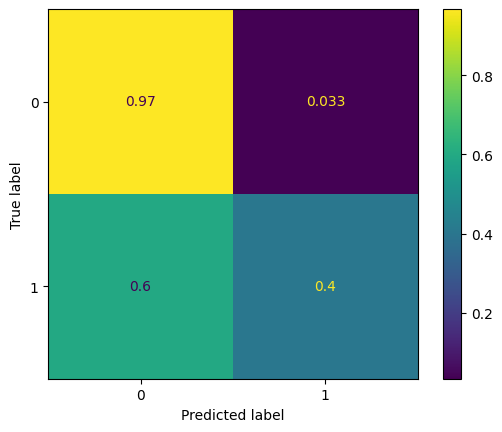

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_val, xg_y_model, normalize='true')          #y_val are hte ones that we have that are actually true, xg_y_model returns the predicted y_val and there was 88% accuracy
# Assuming xg_y_model are the predictions from your XGBoost model
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Our XGBoost model performs well on predicting **class 0** and performs poorly on predicting **class 1**, it may be caused by the imbalance of data provided(the target variable has more ‘No’ values than ‘Yes’ values). You can learn the best way to deal with imbalanced data here.

One way to increase the model performance is by applying the Grid search method as an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. You can skip this cell if you would like.

In [150]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'gamma': 0.5, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 1.0}


The above source code will evaluate which parameter values for min_child_weight, gamma, subsample and max_depth will give us better performance.

Let’s use these parameter values and see if the XGB model performance will increase.

In [151]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.10879728006799827


Our XGB model has improved from the previous performance of **0.112** to **0.108**.


In [156]:
# Get the predicted result for the test Data
test.bank_account = xgb_model.predict(processed_test)

Then we create a submission file according to the instruction provided in the SubmissionFile.csv.


In [165]:
# Create test_bank account DataFrame
test_bank_account= pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

Let’s observe the sample results from our submission DataFrame.


In [166]:
#show the five sample
test_bank_account.sample(5)

,uniqueid,bank_account
5725,uniqueid_11860 x Rwanda,0
5410,uniqueid_11545 x Rwanda,0
6267,uniqueid_12402 x Rwanda,0
3306,uniqueid_9441 x Rwanda,0
8511,uniqueid_8786 x Tanzania,0
